# ALNS Algorithm Performance Analysis & Parameter Tuning Visualization

##  Project Overview
This notebook is designed to analyze and visualize the performance metrics of the **Adaptive Large Neighborhood Search (ALNS)** algorithm applied to the Traveling Salesperson Problem (TSP). The study specifically focuses on the impact of the **Simulated Annealing (SA)** mechanism and its hyperparameters on the optimization process.

Comprehensive Exploratory Data Analysis (EDA) was conducted using **R** and various libraries to understand the algorithm's behavior under various configurations.

##  Analysis Objectives
This study aims to answer the following key questions:
* How fast does the algorithm converge to a global (or near-global) optimum?
* What is the impact of the **Cooling Rate ($\alpha$)** and **Initial Temperature ($T$)** on the final solution quality?
* How stable is the algorithm across different random seeds?

##  Visualizations & Content
This notebook includes the following visual analyses:

### 1. Convergence Behavior
* **Optimization Progress:** Tracking the descent of the objective function (Total Cost) over iterations.
* **Cooling Schedule:** A dual-axis visualization showing the relationship between Temperature ($T$) decay and the improvement of the best solution found.

### 2. Parameter Tuning
* **Cost Comparison:** Comparing average objective function values across different combinations of $T$ and $\alpha$.
* **Interaction Plots:** Analyzing the interaction effects between initial temperature and cooling rate (e.g., investigating if high temperatures negatively affect performance when cooling is too fast).

### 3. Stability Analysis
* **Boxplot Analysis:** Visualizing the distribution, median values, and variance (IQR) of solutions for each parameter set to assess reliability.
* **Performance Heatmap:** A matrix view of average costs to easily identify the optimal parameter "sweet spot."

---
**Libraries Used:** `tidyverse`, `ggplot2`, `dplyr`, `scales`


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "Graph saved as 'alns_convergence_plot_100step.png'"


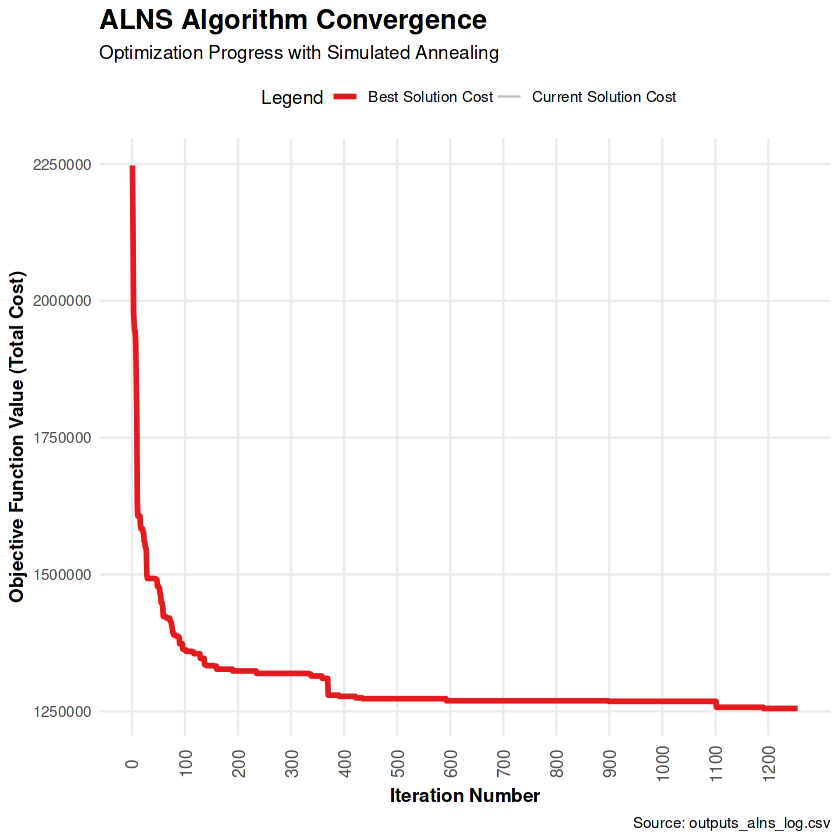

In [1]:
# ==========================================
# ALNS CONVERGENCE PLOT (X-AXIS EVERY 100)
# ==========================================

library(ggplot2)
library(dplyr)
library(readr)

# 1. DATA OKUMA
file_path <- "/kaggle/input/outputs-alns-log-seed1002/outputs_alns_log_seed1002.csv"
df <- read_csv(file_path, show_col_types = FALSE)

# Maksimum iterasyon sayısını bulalım
max_iter <- max(df$iter)

# 2. GRAFİK OLUŞTURMA
plot_obj <- ggplot(df, aes(x = iter)) +
  
  # --- Gri Çizgi (Anlık Hareket) ---
  geom_line(aes(y = current_cost, color = "Current Solution Cost"), 
            alpha = 0.4, linewidth = 0.5) +
  
  # --- Kırmızı Çizgi (En İyi Sonuç) ---
  geom_line(aes(y = best_cost, color = "Best Solution Cost"), 
            linewidth = 1.2) +
  
  # --- EKSEN AYARI (BURASI DEĞİŞTİ) ---
  # by = 100 diyerek her 100 adımda bir sayı yazmasını sağladık
  scale_x_continuous(breaks = seq(0, max_iter, by = 100)) +
  
  # --- Renkler ve Etiketler (İngilizce) ---
  scale_color_manual(name = "Legend", 
                     values = c("Current Solution Cost" = "gray40", 
                                "Best Solution Cost" = "#E41A1C")) +
  
  labs(title = "ALNS Algorithm Convergence",
       subtitle = "Optimization Progress with Simulated Annealing",
       x = "Iteration Number",
       y = "Objective Function Value (Total Cost)",
       caption = "Source: outputs_alns_log.csv") +
  
  # --- Tema Ayarları ---
  theme_minimal() +
  theme(
    legend.position = "top",
    plot.title = element_text(face = "bold", size = 16),
    axis.title = element_text(face = "bold"),
    panel.grid.minor = element_blank(),
    
    # --- ETİKETLERİN BİRBİRİNE GİRMEMESİ İÇİN ---
    # angle = 90 ile sayıları dik yazdırdık
    axis.text.x = element_text(angle = 90, vjust = 0.5, size = 10)
  )

# 3. GÖSTER VE KAYDET
print(plot_obj)

# Genişliği 18 yaparak sayıların rahat sığmasını sağladık
ggsave("alns_convergence_plot_100step.png", plot = plot_obj, width = 18, height = 8, dpi = 300)

print("Graph saved as 'alns_convergence_plot_100step.png'")

[1] "Temizlenmiş veri özeti:"
Rows: 90
Columns: 11
$ exp_id          <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…
$ INITIAL_T       <dbl> 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,…
$ ALPHA_T         <dbl> 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, …
$ `repeat`        <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8,…
$ seed            <dbl> 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, …
$ final_best_cost <dbl> 1307931, 1304522, 1312359, 1299578, 1299859, 1290379, …
$ feasible        <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ iterations      <dbl> 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 625,…
$ runtime_sec     <dbl> 92.87519, 102.37806, 61.44771, 56.49491, 66.53322, 56.…
$ INITIAL_T_Fact  <fct> 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,…
$ ALPHA_T_Fact    <fct> 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, …
# A tibble: 90 × 11
   exp_id INITIAL_T ALPHA_T `repeat`  seed final_

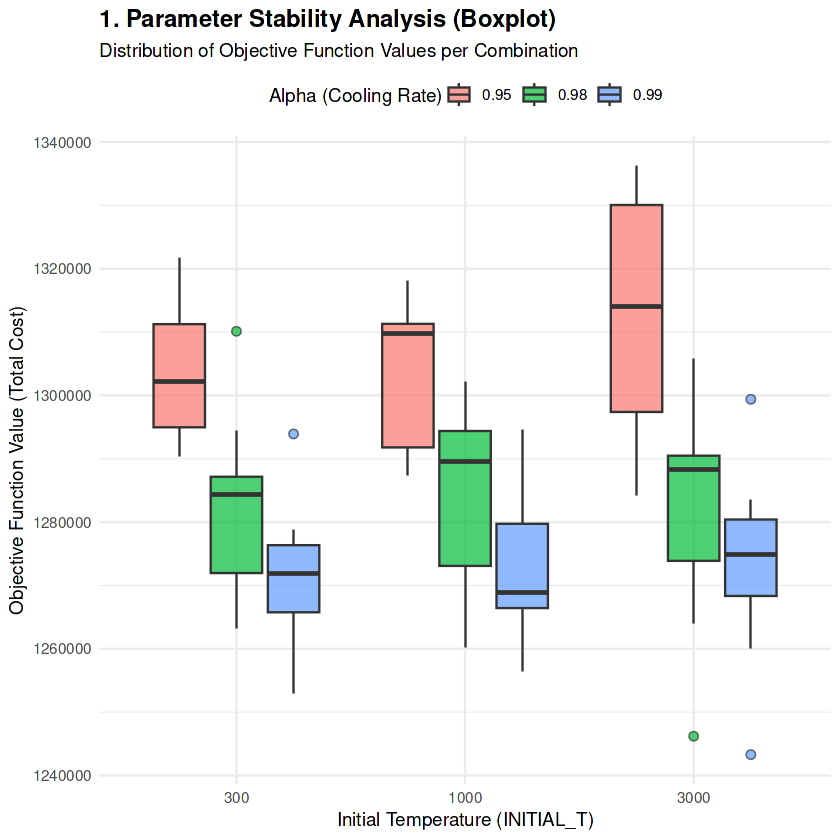

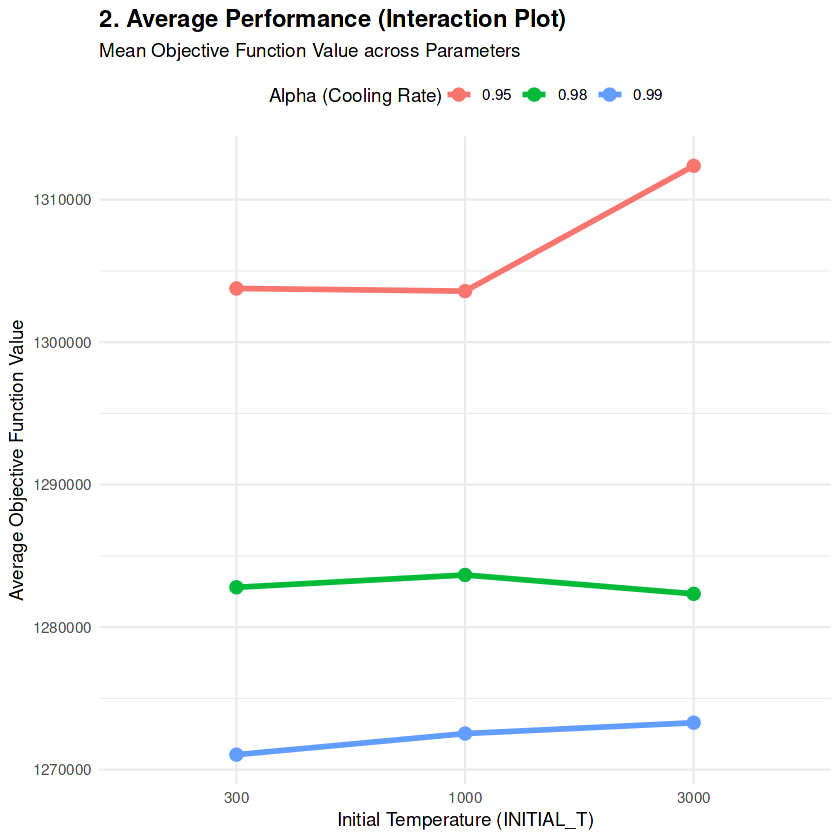

[1] "Tüm grafikler başarıyla oluşturuldu ve kaydedildi."


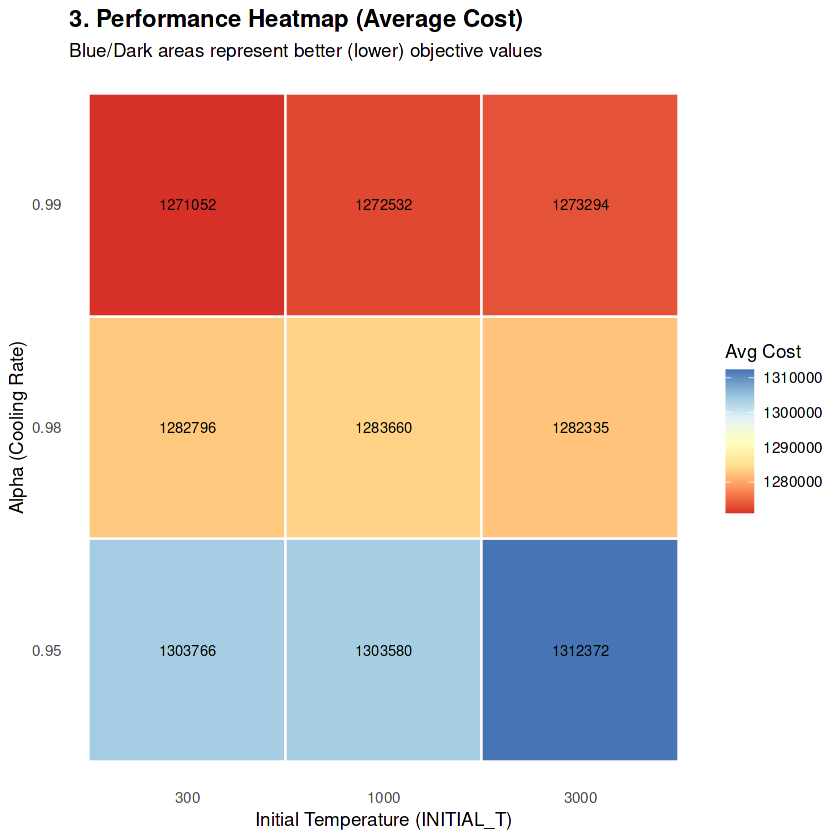

In [2]:
# ==========================================
# PARAMETER TUNING ANALYSIS VISUALIZATION
# ==========================================

library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)

# 1. VERİ OKUMA VE HAZIRLIK
# ---------------------------
file_path <- "/kaggle/input/tuning-results/tuning_results.csv"
df_raw <- read_csv(file_path, show_col_types = FALSE)

# --- ÖNEMLİ: Veri Temizliği ---
df_clean <- df_raw %>%
  # 1. Sadece uygun (feasible) çözümleri alalım. Fizibl olmayan çözümün maliyeti önemsizdir.
  # Dosyandaki True/False veya 1/0 durumuna göre burayı güncellemen gerekebilir.
  # Genelde R'da TRUE/FALSE veya 1/0 olarak okunur.
  filter(feasible == TRUE | feasible == 1) %>%
  
  # 2. Parametreleri sayı yerine "kategori" (factor) olarak ele alalım.
  # Bu, grafiklerde sıralamanın doğru olmasını sağlar.
  mutate(
    INITIAL_T_Fact = factor(INITIAL_T, levels = sort(unique(INITIAL_T))),
    ALPHA_T_Fact = factor(ALPHA_T, levels = sort(unique(ALPHA_T)))
  )

print("Temizlenmiş veri özeti:")
print(glimpse(df_clean))


# ==============================================================================
# GRAFİK 1: Kutu Grafiği (Boxplot) - Dağılım ve İstikrar Analizi
# ==============================================================================
# Amacı: Hangi kombinasyonun daha düşük medyan değere sahip olduğunu ve
# hangisinin sonuçlarının daha az değişken (daha dar kutu) olduğunu görmek.

plot_box <- ggplot(df_clean, aes(x = INITIAL_T_Fact, y = final_best_cost, fill = ALPHA_T_Fact)) +
  geom_boxplot(outlier.shape = 21, outlier.size = 2, alpha = 0.7) +
  
  labs(title = "1. Parameter Stability Analysis (Boxplot)",
       subtitle = "Distribution of Objective Function Values per Combination",
       x = "Initial Temperature (INITIAL_T)",
       y = "Objective Function Value (Total Cost)",
       fill = "Alpha (Cooling Rate)") +
  
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    legend.position = "top",
    axis.text.x = element_text(angle = 0, hjust = 0.5)
  )

print(plot_box)
ggsave("tuning_1_boxplot_stability.png", plot = plot_box, width = 12, height = 7)


# ==============================================================================
# GRAFİK 2: Etkileşim Grafiği (Line Plot of Means) - Ortalama Performans
# ==============================================================================
# Amacı: Parametrelerin ortalama etkisini görmek. Çizgilerin eğimi ve
# birbirini kesip kesmemesi, parametrelerin etkileşimini gösterir.

# Önce ortalamaları hesaplayalım
df_summary <- df_clean %>%
  group_by(INITIAL_T_Fact, ALPHA_T_Fact) %>%
  summarise(
    Mean_Cost = mean(final_best_cost),
    Min_Cost = min(final_best_cost),
    .groups = 'drop'
  )

plot_line <- ggplot(df_summary, aes(x = INITIAL_T_Fact, y = Mean_Cost, group = ALPHA_T_Fact, color = ALPHA_T_Fact)) +
  geom_line(linewidth = 1.2) +
  geom_point(size = 3) +
  
  labs(title = "2. Average Performance (Interaction Plot)",
       subtitle = "Mean Objective Function Value across Parameters",
       x = "Initial Temperature (INITIAL_T)",
       y = "Average Objective Function Value",
       color = "Alpha (Cooling Rate)") +
  
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    legend.position = "top"
  )

print(plot_line)
ggsave("tuning_2_lineplot_means.png", plot = plot_line, width = 10, height = 6)


# ==============================================================================
# GRAFİK 3: Isı Haritası (Heatmap) - En İyi Bölge Özeti
# ==============================================================================
# Amacı: En düşük maliyetin (koyu mavi/yeşil alanlar) hangi köşede toplandığını
# hızlıca görmek. Kırmızı alanlar kötü (yüksek maliyetli) bölgelerdir.

# Isı haritasında renkler önemlidir. Düşük maliyet (iyi) soğuk renk, yüksek maliyet (kötü) sıcak renk olsun.
plot_heat <- ggplot(df_summary, aes(x = INITIAL_T_Fact, y = ALPHA_T_Fact, fill = Mean_Cost)) +
  geom_tile(color = "white", linewidth = 0.5) +
  
  # Maliyet değerini kutuların içine yazdıralım (Okunabilirlik için yuvarlayarak)
  geom_text(aes(label = round(Mean_Cost, 0)), color = "black", size = 3) +
  
  # Renk Skalası: Kırmızı (Yüksek/Kötü) -> Sarı -> Mavi (Düşük/İyi)
  scale_fill_distiller(palette = "RdYlBu", direction = 1, name = "Avg Cost") +
  
  labs(title = "3. Performance Heatmap (Average Cost)",
       subtitle = "Blue/Dark areas represent better (lower) objective values",
       x = "Initial Temperature (INITIAL_T)",
       y = "Alpha (Cooling Rate)") +
  
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    panel.grid = element_blank() # Isı haritasında ızgara çizgilerine gerek yok
  )

print(plot_heat)
ggsave("tuning_3_heatmap_summary.png", plot = plot_heat, width = 10, height = 8)

print("Tüm grafikler başarıyla oluşturuldu ve kaydedildi.")

[1] "Best Configuration:"
# A tibble: 1 × 5
  INITIAL_T ALPHA_T Avg_Cost Config_Label  Category       
      <dbl>   <dbl>    <dbl> <chr>         <chr>          
1       300    0.99 1271052. T=300, α=0.99 Selected (Best)
[1] "Graph saved as 'parameter_comparison_bar_chart_eng.png'"


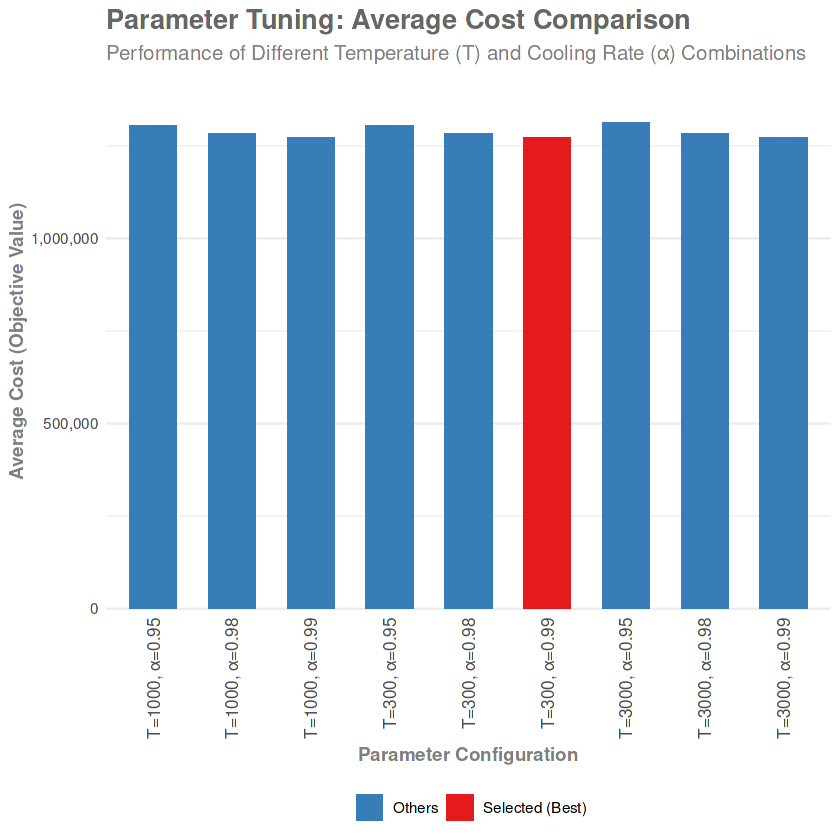

In [3]:
# ==========================================
# PARAMETER COMPARISON BAR CHART (ENGLISH)
# ==========================================

library(ggplot2)
library(dplyr)
library(readr)

# 1. READ DATA
file_path <- "/kaggle/input/tuning-results/tuning_results.csv"
df <- read_csv(file_path, show_col_types = FALSE)

# 2. DATA PREPARATION
# Calculate AVERAGE cost for each parameter group (Initial T & Alpha)
df_summary <- df %>%
  filter(feasible == TRUE | feasible == 1) %>%  # Filter only feasible solutions
  group_by(INITIAL_T, ALPHA_T) %>%
  summarise(
    Avg_Cost = mean(final_best_cost),
    .groups = 'drop'
  ) %>%
  # Create labels for the X-axis
  mutate(
    Config_Label = paste0("T=", INITIAL_T, ", α=", ALPHA_T)
  )

# 3. IDENTIFY THE BEST CONFIGURATION
# Logic to automatically find the minimum average cost
min_cost_value <- min(df_summary$Avg_Cost)

df_summary <- df_summary %>%
  mutate(
    Category = ifelse(Avg_Cost == min_cost_value, "Selected (Best)", "Others")
  )

# Print best config to console for verification
print("Best Configuration:")
print(df_summary %>% filter(Category == "Selected (Best)"))

# 4. PLOTTING
plot_bar <- ggplot(df_summary, aes(x = Config_Label, y = Avg_Cost, fill = Category)) +
  
  # Draw columns
  geom_col(width = 0.6) + 
  
  # --- Color Settings (Red for Best, Blue for Others) ---
  scale_fill_manual(values = c("Others" = "#377eb8",           # Blue
                               "Selected (Best)" = "#e41a1c")) + # Red
  
  # --- English Labels & Titles ---
  labs(title = "Parameter Tuning: Average Cost Comparison",
       subtitle = "Performance of Different Temperature (T) and Cooling Rate (α) Combinations",
       x = "Parameter Configuration",
       y = "Average Cost (Objective Value)",
       fill = "Status") +
  
  # --- Theme & Appearance ---
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 16, color = "gray40"),
    plot.subtitle = element_text(size = 12, color = "gray50"),
    axis.title = element_text(face = "bold", color = "gray50"),
    legend.position = "bottom", 
    legend.title = element_blank(),
    
    # Rotate X-axis labels 90 degrees for readability
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 10),
    
    # Remove vertical grid lines
    panel.grid.major.x = element_blank()
  ) +
  
  # Format Y-axis numbers (add commas, e.g., 1,000,000)
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE, big.mark = ","),
                     expand = expansion(mult = c(0, 0.1)))

# 5. DISPLAY & SAVE
print(plot_bar)

ggsave("parameter_comparison_bar_chart_eng.png", plot = plot_bar, width = 10, height = 6, dpi = 300)
print("Graph saved as 'parameter_comparison_bar_chart_eng.png'")

[1] "Zoomed graph saved as 'parameter_comparison_zoomed_eng.png'"


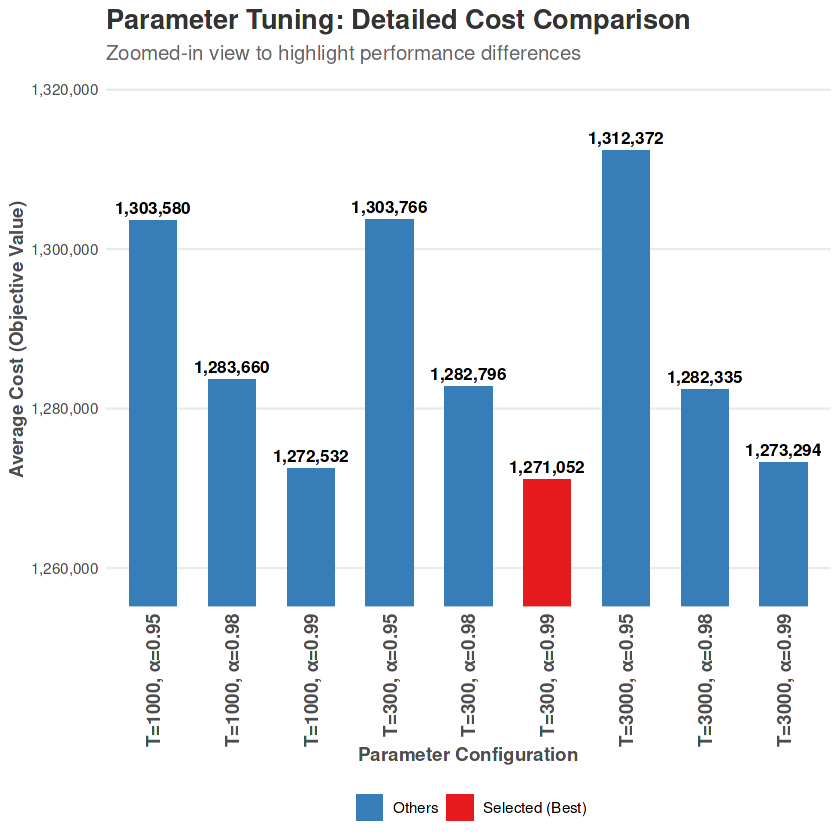

In [4]:
# ==========================================================
# PARAMETER COMPARISON BAR CHART (ZOOMED IN FOR DETAIL)
# ==========================================================

library(ggplot2)
library(dplyr)
library(readr)

# 1. READ DATA
file_path <- "/kaggle/input/tuning-results/tuning_results.csv"
df <- read_csv(file_path, show_col_types = FALSE)

# 2. DATA PREPARATION
df_summary <- df %>%
  filter(feasible == TRUE | feasible == 1) %>%
  group_by(INITIAL_T, ALPHA_T) %>%
  summarise(
    Avg_Cost = mean(final_best_cost),
    .groups = 'drop'
  ) %>%
  mutate(
    Config_Label = paste0("T=", INITIAL_T, ", α=", ALPHA_T)
  )

# 3. IDENTIFY BEST & CALCULATE LIMITS FOR ZOOM
min_cost_value <- min(df_summary$Avg_Cost)
max_cost_value <- max(df_summary$Avg_Cost)

# Farkın belli olması için Y ekseni alt sınırını hesaplayalım
# En küçük değerin %1 altına "taban" çizgisini koyuyoruz.
y_lower_limit <- min_cost_value * 0.99 
y_upper_limit <- max_cost_value * 1.005 # Üstte etiketler için az boşluk

df_summary <- df_summary %>%
  mutate(
    Category = ifelse(Avg_Cost == min_cost_value, "Selected (Best)", "Others")
  )

# 4. PLOTTING
plot_bar <- ggplot(df_summary, aes(x = Config_Label, y = Avg_Cost, fill = Category)) +
  
  # Draw columns
  geom_col(width = 0.6) + 
  
  # --- Add Values on Top of Bars (Sayıları çubukların üstüne yaz) ---
  geom_text(aes(label = format(round(Avg_Cost), big.mark = ",")), 
            vjust = -0.5, size = 3.5, fontface = "bold", color = "black") +
  
  # --- Color Settings ---
  scale_fill_manual(values = c("Others" = "#377eb8", 
                               "Selected (Best)" = "#e41a1c")) +
  
  # --- ZOOM EFFECT (ÖNEMLİ KISIM) ---
  # Y eksenini kesip sadece ilgili aralığa odaklanıyoruz
  coord_cartesian(ylim = c(y_lower_limit, y_upper_limit)) +
  
  # --- Labels ---
  labs(title = "Parameter Tuning: Detailed Cost Comparison",
       subtitle = "Zoomed-in view to highlight performance differences",
       x = "Parameter Configuration",
       y = "Average Cost (Objective Value)",
       fill = "Status") +
  
  # --- Theme ---
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 16, color = "gray20"),
    plot.subtitle = element_text(size = 12, color = "gray40"),
    axis.title = element_text(face = "bold", color = "gray30"),
    legend.position = "bottom",
    legend.title = element_blank(),
    
    # X-axis labels rotated
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 11, face = "bold"),
    
    # Hide minor grids
    panel.grid.minor = element_blank(),
    panel.grid.major.x = element_blank()
  ) +
  
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE, big.mark = ","))

# 5. SAVE
print(plot_bar)

ggsave("parameter_comparison_zoomed_eng.png", plot = plot_bar, width = 12, height = 7, dpi = 300)
print("Zoomed graph saved as 'parameter_comparison_zoomed_eng.png'")

[1] "Graph saved as 'sa_dual_axis_100step.png'"


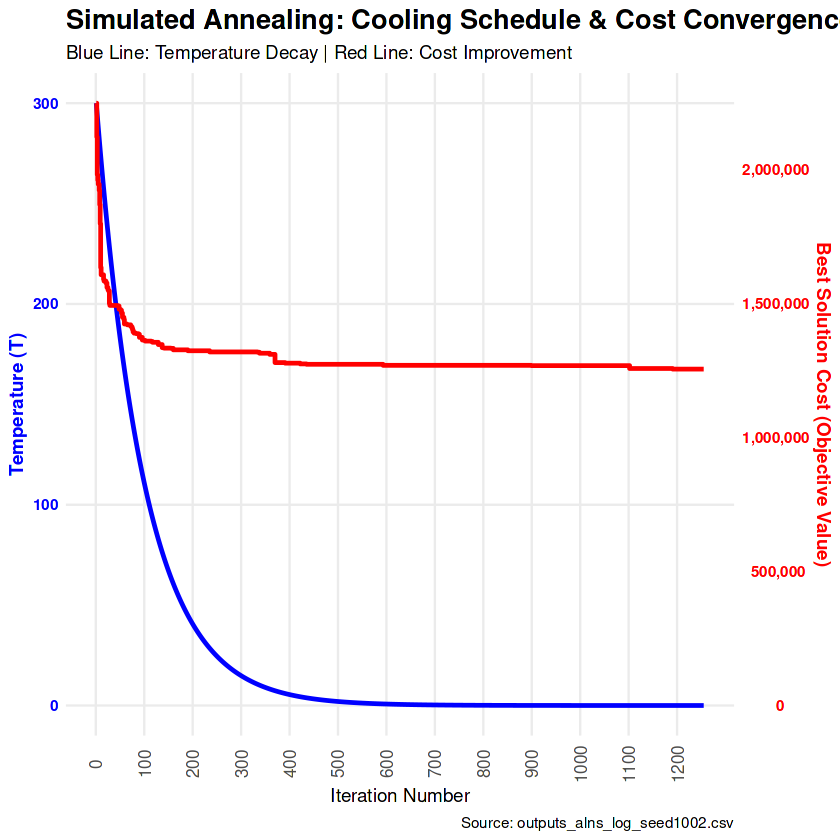

In [6]:
# ==========================================================
# DUAL AXIS PLOT (X-AXIS EVERY 100 STEP)
# ==========================================================

library(ggplot2)
library(dplyr)
library(readr)

# 1. VERİYİ OKUMA
file_path <- "/kaggle/input/outputs-alns-log-seed1002/outputs_alns_log_seed1002.csv"
df <- read_csv(file_path, show_col_types = FALSE)

# 2. ÖLÇEKLENDİRME VE HAZIRLIK
max_t <- max(df$T)
max_cost <- max(df$best_cost)
max_iter <- max(df$iter) # X ekseni sınırını belirlemek için

# Sağ ekseni (Cost) Sol eksene (T) uydurmak için küçültme katsayısı
scale_factor <- max_cost / max_t

# 3. GRAFİK OLUŞTURMA
plot_dual <- ggplot(df, aes(x = iter)) +
  
  # --- Sol Eksen Verisi (Sıcaklık - Mavi) ---
  geom_line(aes(y = T), color = "blue", linewidth = 1) +
  
  # --- Sağ Eksen Verisi (Maliyet - Kırmızı) ---
  # Veriyi ölçeklendirerek çiziyoruz
  geom_step(aes(y = best_cost / scale_factor), color = "red", linewidth = 1) +
  
  # --- X EKSENİ AYARI (100'er ADIM) ---
  scale_x_continuous(breaks = seq(0, max_iter, by = 100)) +
  
  # --- Y EKSENLERİ AYARI (ÇİFT EKSEN) ---
  scale_y_continuous(
    name = "Temperature (T)", # Sol Eksen Başlığı
    
    # Sağ eksen formülü (Değeri geri büyüterek gösteriyoruz)
    sec.axis = sec_axis(~ . * scale_factor, 
                        name = "Best Solution Cost (Objective Value)",
                        labels = function(x) format(x, scientific = FALSE, big.mark = ","))
  ) +
  
  # --- Başlıklar ---
  labs(title = "Simulated Annealing: Cooling Schedule & Cost Convergence",
       subtitle = "Blue Line: Temperature Decay | Red Line: Cost Improvement",
       x = "Iteration Number",
       caption = "Source: outputs_alns_log_seed1002.csv") +
  
  # --- Tema ve Görünüm ---
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 16),
    
    # Eksen Renkleri
    axis.title.y.left = element_text(color = "blue", face = "bold"),
    axis.text.y.left = element_text(color = "blue", face = "bold"),
    axis.title.y.right = element_text(color = "red", face = "bold"),
    axis.text.y.right = element_text(color = "red", face = "bold"),
    
    # --- X EKSENİ YAZILARI (DİK) ---
    axis.text.x = element_text(angle = 90, vjust = 0.5, size = 10),
    
    panel.grid.minor = element_blank()
  )

# 4. KAYDETME
print(plot_dual)

# Genişliği 18 yaparak sayıların rahat sığmasını sağladık
ggsave("sa_dual_axis_100step.png", plot = plot_dual, width = 18, height = 8, dpi = 300)
print("Graph saved as 'sa_dual_axis_100step.png'")